<a href="https://colab.research.google.com/github/tejasgadgil/Match-And-Catch/blob/main/GandhaarQuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#load excel sheet into a pd df
file_path = '/content/ModifiedAnswers.xlsx'
df = pd.read_excel(file_path)

#select columns containing text data (ignore email column)
text_columns = df.columns[1:]

#combine all text columns into a single column for each student
df['combined_answers'] = df[text_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

#CountVectorizer - text data into a matrix of token counts
vectorizer = CountVectorizer()
text_matrix = vectorizer.fit_transform(df['combined_answers'])

#calculate cosine similarity between each pair
similarity_matrix = cosine_similarity(text_matrix, text_matrix)

#create df to store the similarity scores
similarity_df = pd.DataFrame(similarity_matrix, columns=df['Email Address'], index=df['Email Address'])

#find the most similar pairs
most_similar_pairs = []
for email in df['Email Address']:
    similar_classmates = similarity_df[email].sort_values(ascending=False)[1:3]  #top 2 most similar classmates
    most_similar_pairs.append((email, similar_classmates.index[0], similar_classmates.index[1]))

#display the most similar pairs
for pair in most_similar_pairs:
    print(f"{pair[0]} is most similar to {pair[1]} and {pair[2]}")



aishwarya.m.patil@cumminscollege.in is most similar to anoushka.wadyalkar@cumminscollege.in and kritika.dubey@cumminscollege.in
priya.shah@cumminscollege.in is most similar to aahana.kulkarni@cumminscollege.in and kritika.dubey@cumminscollege.in
gauri.choudhari@cumminscollege.in is most similar to saniya.damle@cumminscollege.in and jahnavi.dande@cumminscollege.in
anuja.ambewadikar@cumminscollege.in is most similar to snigdha.chitnis@cumminscollege.in and shrimayee.adkar@cumminscollege.in
snigdha.chitnis@cumminscollege.in is most similar to anuja.ambewadikar@cumminscollege.in and vaishnavi.jejurkar@cumminscollege.in
vaishnavi.jejurkar@cumminscollege.in is most similar to sanskruti.gangwal@cumminscollege.in and snigdha.chitnis@cumminscollege.in
sakshi.bajaj@cumminscollege.in is most similar to ananya.balaji@cumminscollege.in and gauri.choudhari@cumminscollege.in
kritika.dubey@cumminscollege.in is most similar to aarya.ambekar@cumminscollege.in and anoushka.wadyalkar@cumminscollege.in
aah

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#load excel sheet into a pd df
file_path = '/content/ModifiedAnswers.xlsx'
df = pd.read_excel(file_path)

#select columns containing text data (ignore email column)
text_columns = df.columns[1:]

#combine all text columns into a single column for each student
df['combined_answers'] = df[text_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

#CountVectorizer - text data into a matrix of token counts
vectorizer = CountVectorizer()
text_matrix = vectorizer.fit_transform(df['combined_answers'])

#calculate cosine similarity
similarity_matrix = cosine_similarity(text_matrix, text_matrix)

#create df to store the similarity scores
similarity_df = pd.DataFrame(similarity_matrix, columns=df['Email Address'], index=df['Email Address'])

#find most similar pairs while ensuring each person is matched only once
matched_emails = set()
matched_pairs = []
for email in df['Email Address']:
    #sort similarity scores in descending order and find the most similar person not already matched
    similar_person = similarity_df[email].sort_values(ascending=False)
    for match_email in similar_person.index:
        if match_email != email and match_email not in matched_emails and email not in matched_emails:
            matched_pairs.append((email, match_email))
            matched_emails.add(email)
            matched_emails.add(match_email)
            break

#display the matched pairs
for pair in matched_pairs:
    print(f"{pair[0]} is matched with {pair[1]}")


aishwarya.m.patil@cumminscollege.in is matched with anoushka.wadyalkar@cumminscollege.in
priya.shah@cumminscollege.in is matched with aahana.kulkarni@cumminscollege.in
gauri.choudhari@cumminscollege.in is matched with saniya.damle@cumminscollege.in
anuja.ambewadikar@cumminscollege.in is matched with snigdha.chitnis@cumminscollege.in
vaishnavi.jejurkar@cumminscollege.in is matched with sanskruti.gangwal@cumminscollege.in
sakshi.bajaj@cumminscollege.in is matched with ananya.balaji@cumminscollege.in
kritika.dubey@cumminscollege.in is matched with aarya.ambekar@cumminscollege.in
tejaswini.patkar@cumminscollege.in is matched with janhavi.pendharkar@cumminscollege.in
pragati.chandra@cumminscollege.in is matched with shrimayee.adkar@cumminscollege.in
anvayee.jalgaonkar@cumminscollege.in is matched with jahnavi.dande@cumminscollege.in


In [31]:
import pandas as pd
from itertools import combinations
from sklearn.metrics import jaccard_score

# Load the Excel sheet
file_path = '/content/ModifiedAnswers.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Extract email ids and answers columns
email_column = df.columns[0]
answers_columns = df.columns[1:]

# Create a dictionary to store email ids and their corresponding answers
data = {email: list(df.loc[df[email_column] == email, answers_columns].values.flatten()) for email in df[email_column]}

# Find the most similar pairs based on Jaccard similarity
max_similarity = 0
most_similar_pair = ()

for pair in combinations(data.keys(), 2):
    similarity = jaccard_score(data[pair[0]], data[pair[1]], average='weighted')  # Specify the 'average' parameter

    if similarity > max_similarity:
        max_similarity = similarity
        most_similar_pair = pair

# Print the most similar pair and their similarity score
print(f"The most similar pair is: {most_similar_pair} with a similarity score of {max_similarity}")




The most similar pair is: ('tejas.gadgil@cumminscollege.in', 'shrimayee.adkar@cumminscollege.in') with a similarity score of 0.7


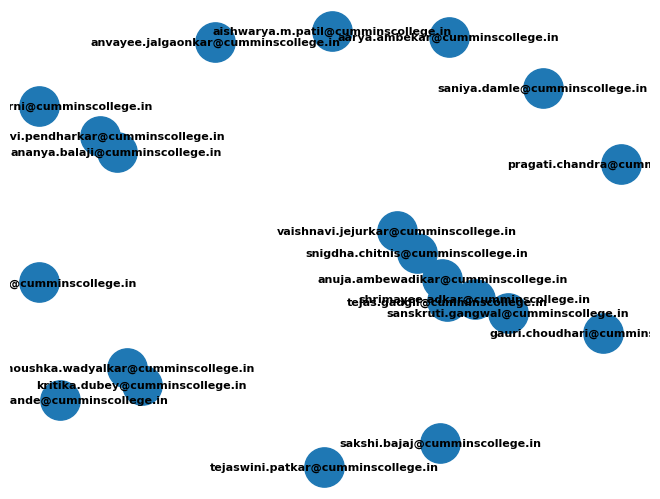

In [32]:
import pandas as pd
from itertools import combinations
from sklearn.metrics import jaccard_score
import networkx as nx
import matplotlib.pyplot as plt

# Load the Excel sheet
file_path = '/content/ModifiedAnswers.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Extract email ids and answers columns
email_column = df.columns[0]
answers_columns = df.columns[1:]

# Create a dictionary to store email ids and their corresponding answers
data = {email: list(df.loc[df[email_column] == email, answers_columns].values.flatten()) for email in df[email_column]}

# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(data.keys())

# Find the most similar pairs based on Jaccard similarity
max_similarity = 0
most_similar_pair = ()

for pair in combinations(data.keys(), 2):
    similarity = jaccard_score(data[pair[0]], data[pair[1]], average='weighted')  # Specify the 'average' parameter

    # Add an edge if the similarity is above a certain threshold (adjust as needed)
    if similarity > 0.5:
        G.add_edge(pair[0], pair[1], weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # You can try other layout algorithms as well
nx.draw(G, pos, with_labels=True, font_size=8, node_size=800, font_color="black", font_weight="bold")

# Add edge labels with similarity scores
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the graph
plt.show()


In [33]:
import pandas as pd
from itertools import combinations
from sklearn.metrics import jaccard_score

# Load the Excel sheet
file_path = '/content/ModifiedAnswers.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Extract email ids and answers columns
email_column = df.columns[0]
answers_columns = df.columns[1:]

# Create a dictionary to store email ids and their corresponding answers
data = {email: list(df.loc[df[email_column] == email, answers_columns].values.flatten()) for email in df[email_column]}

# Pair each classmate with their closest match
closest_matches = {}

for email, other_email in combinations(data.keys(), 2):
    similarity = jaccard_score(data[email], data[other_email], average='weighted')

    if email not in closest_matches or similarity > closest_matches[email][1]:
        closest_matches[email] = (other_email, similarity)

    if other_email not in closest_matches or similarity > closest_matches[other_email][1]:
        closest_matches[other_email] = (email, similarity)

# Print the pairs of closest matches
for email, (closest_match, similarity) in closest_matches.items():
    print(f"{email} is closest to {closest_match} with a similarity score of {similarity}")



aishwarya.m.patil@cumminscollege.in is closest to vaishnavi.jejurkar@cumminscollege.in with a similarity score of 0.5
priya.shah@cumminscollege.in is closest to snigdha.chitnis@cumminscollege.in with a similarity score of 0.4
gauri.choudhari@cumminscollege.in is closest to jahnavi.dande@cumminscollege.in with a similarity score of 0.5
anuja.ambewadikar@cumminscollege.in is closest to snigdha.chitnis@cumminscollege.in with a similarity score of 0.6
snigdha.chitnis@cumminscollege.in is closest to anuja.ambewadikar@cumminscollege.in with a similarity score of 0.6
vaishnavi.jejurkar@cumminscollege.in is closest to snigdha.chitnis@cumminscollege.in with a similarity score of 0.6
sakshi.bajaj@cumminscollege.in is closest to ananya.balaji@cumminscollege.in with a similarity score of 0.5
kritika.dubey@cumminscollege.in is closest to anoushka.wadyalkar@cumminscollege.in with a similarity score of 0.6
aahana.kulkarni@cumminscollege.in is closest to aishwarya.m.patil@cumminscollege.in with a simi

In [34]:
import pandas as pd
from itertools import combinations
from sklearn.metrics import jaccard_score

# Load the Excel sheet
file_path = '/content/ModifiedAnswers.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Extract email ids and answers columns
email_column = df.columns[0]
answers_columns = df.columns[1:]

# Create a dictionary to store email ids and their corresponding answers
data = {email: list(df.loc[df[email_column] == email, answers_columns].values.flatten()) for email in df[email_column]}

# Pair each classmate with their closest match
closest_matches = []

for email, other_email in combinations(data.keys(), 2):
    similarity = jaccard_score(data[email], data[other_email], average='weighted')

    closest_matches.append((email, other_email, similarity))

# Sort the pairs based on similarity scores in descending order
closest_matches.sort(key=lambda x: x[2], reverse=True)

# Print the pairs of closest matches in decreasing order of similarity scores
for email, other_email, similarity in closest_matches:
    print(f"{email} is closest to {other_email} with a similarity score of {similarity}")


tejas.gadgil@cumminscollege.in is closest to shrimayee.adkar@cumminscollege.in with a similarity score of 0.7
anuja.ambewadikar@cumminscollege.in is closest to snigdha.chitnis@cumminscollege.in with a similarity score of 0.6
anuja.ambewadikar@cumminscollege.in is closest to tejas.gadgil@cumminscollege.in with a similarity score of 0.6
anuja.ambewadikar@cumminscollege.in is closest to shrimayee.adkar@cumminscollege.in with a similarity score of 0.6
snigdha.chitnis@cumminscollege.in is closest to vaishnavi.jejurkar@cumminscollege.in with a similarity score of 0.6
kritika.dubey@cumminscollege.in is closest to anoushka.wadyalkar@cumminscollege.in with a similarity score of 0.6
ananya.balaji@cumminscollege.in is closest to janhavi.pendharkar@cumminscollege.in with a similarity score of 0.6
sanskruti.gangwal@cumminscollege.in is closest to shrimayee.adkar@cumminscollege.in with a similarity score of 0.6
aishwarya.m.patil@cumminscollege.in is closest to vaishnavi.jejurkar@cumminscollege.in wi

In [35]:
import pandas as pd
from itertools import combinations
from sklearn.metrics import jaccard_score
from prettytable import PrettyTable

# Load the Excel sheet
file_path = '/content/ModifiedAnswers.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Extract email ids and answers columns
email_column = df.columns[0]
answers_columns = df.columns[1:]

# Create a dictionary to store email ids and their corresponding answers
data = {email: list(df.loc[df[email_column] == email, answers_columns].values.flatten()) for email in df[email_column]}

# Pair each classmate with their closest match
closest_matches = []

for email, other_email in combinations(data.keys(), 2):
    similarity = jaccard_score(data[email], data[other_email], average='weighted')

    closest_matches.append((email, other_email, similarity))

# Sort the pairs based on similarity scores in descending order
closest_matches.sort(key=lambda x: x[2], reverse=True)

# Create a PrettyTable and set column names
table = PrettyTable()
table.field_names = ["Classmate 1", "Classmate 2", "Similarity Score"]

# Add rows to the table
for email, other_email, similarity in closest_matches:
    table.add_row([email, other_email, similarity])

# Print the table
print(table)


+--------------------------------------+--------------------------------------+------------------+
|             Classmate 1              |             Classmate 2              | Similarity Score |
+--------------------------------------+--------------------------------------+------------------+
|    tejas.gadgil@cumminscollege.in    |  shrimayee.adkar@cumminscollege.in   |       0.7        |
| anuja.ambewadikar@cumminscollege.in  |  snigdha.chitnis@cumminscollege.in   |       0.6        |
| anuja.ambewadikar@cumminscollege.in  |    tejas.gadgil@cumminscollege.in    |       0.6        |
| anuja.ambewadikar@cumminscollege.in  |  shrimayee.adkar@cumminscollege.in   |       0.6        |
|  snigdha.chitnis@cumminscollege.in   | vaishnavi.jejurkar@cumminscollege.in |       0.6        |
|   kritika.dubey@cumminscollege.in    | anoushka.wadyalkar@cumminscollege.in |       0.6        |
|   ananya.balaji@cumminscollege.in    | janhavi.pendharkar@cumminscollege.in |       0.6        |
| sanskrut